In [1]:
import SimDAT2D as sim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

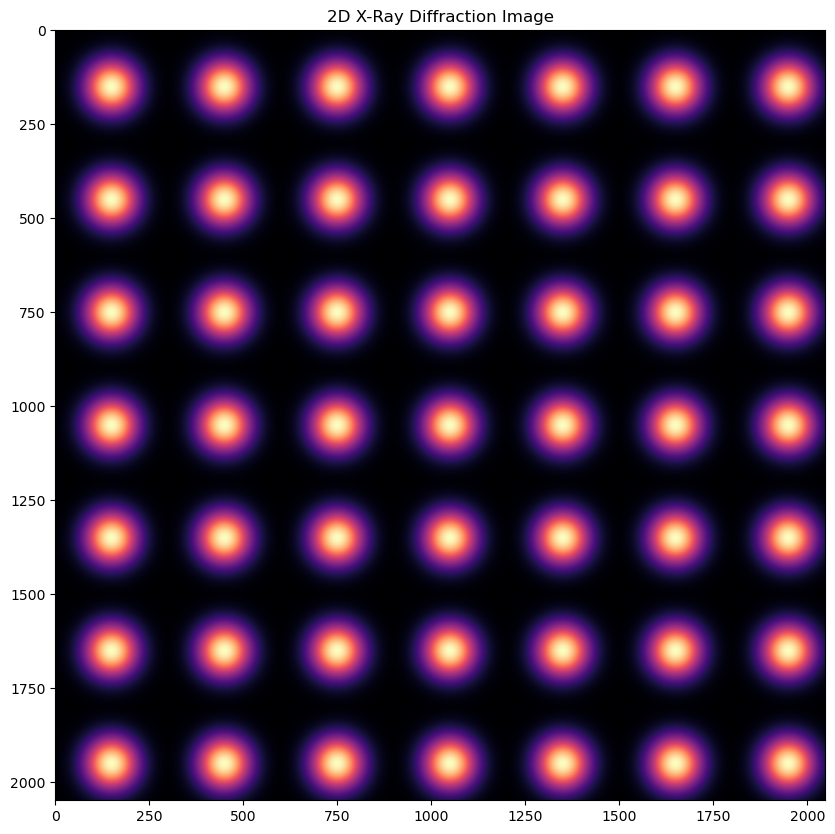

In [2]:
anisotropic = sim.create_anisotropic(10, 50, 300, 300, cmap = 'magma')

In [6]:
def find_highest_intensity_locations(image, num_locations):
    # Flatten the grid to find the highest intensity locations
    flattened_grid = image.flatten()
    
    # Find the indices of the highest intensity locations
    indices = np.argpartition(flattened_grid, -num_locations)[-num_locations:]
    
    # Convert the indices to 2D coordinates
    locations = np.unravel_index(indices, image.shape)
    
    #create a list of x,y coordintes from the locations
    locs = list(zip(locations[0], locations[1]))
    
    return locs

In [12]:
loc = find_highest_intensity_locations(anisotropic, 70)

print(loc)

[(1051, 450), (1649, 450), (1951, 150), (751, 1350), (1350, 1649), (1950, 451), (150, 150), (1051, 150), (1650, 450), (750, 449), (1350, 150), (449, 150), (1050, 750), (750, 450), (449, 1050), (1349, 1650), (1651, 450), (1050, 450), (150, 1950), (1051, 1050), (750, 451), (1350, 450), (1350, 1050), (1950, 749), (1950, 1050), (150, 749), (1950, 450), (750, 750), (150, 751), (1950, 449), (450, 450), (1650, 1950), (1350, 1949), (450, 1651), (1650, 150), (1050, 1050), (150, 151), (1050, 1350), (1950, 1350), (1050, 150), (450, 1350), (750, 150), (450, 1950), (1650, 750), (1950, 1650), (450, 750), (450, 1650), (750, 1950), (150, 1650), (150, 450), (1350, 1350), (1650, 1050), (1050, 1650), (1350, 1650), (450, 1050), (1950, 150), (150, 1350), (750, 1650), (1950, 1950), (1650, 1350), (1350, 1950), (750, 1050), (750, 1350), (150, 1050), (450, 150), (150, 750), (1650, 1650), (1950, 750), (1050, 1950), (1350, 750)]


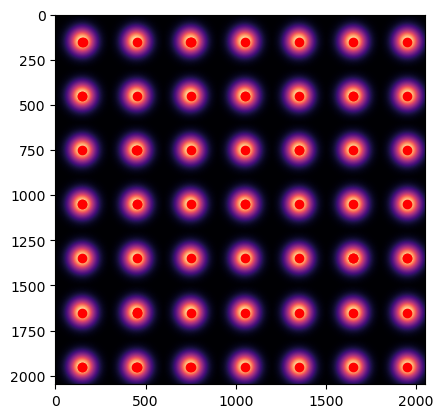

In [13]:
#I would like to create an image where these locations are marked with a red dot
def plot_locations(image, locations):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='magma')
    
    for loc in locations:
        ax.plot(loc[1], loc[0], 'ro')
    
    plt.show()
    
plot_locations(anisotropic, loc)

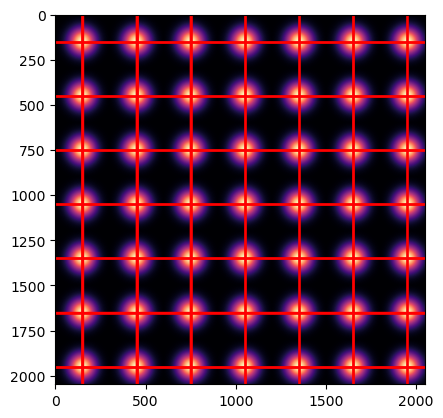

In [38]:
#I would like to create a function that adds horizontal and vertical lines with intensity values of 1 through highest intensity locations
#where the length of the lines is the length of the image

def plot_lines(image, locations):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='magma')
    
    for loc in locations:
        ax.axhline(y=loc[0], color='r', linewidth=1)
        ax.axvline(x=loc[1], color='r', linewidth=1)
    
    plt.show()
    
z =plot_lines(anisotropic, loc)

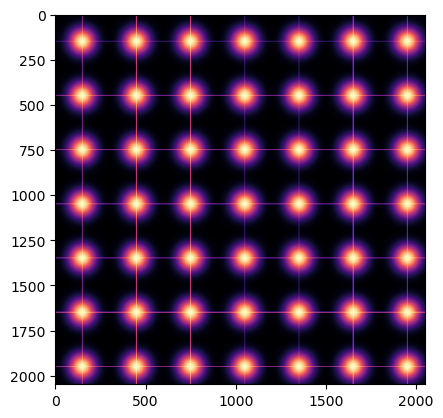

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lines_and_save(image, locations):
    # Create a copy of the original image to modify
    modified_image = np.copy(image)
    
    # Draw lines on the image at the specified locations
    for loc in locations:
        y, x = loc
        
        # Draw horizontal and vertical lines
        modified_image[y, :] = np.max(image)  # Set the entire row to the max intensity value
        modified_image[:, x] = np.max(image)  # Set the entire column to the max intensity value
    
    # Plot the image with the lines
    fig, ax = plt.subplots()
    ax.imshow(modified_image, cmap='magma')
    plt.show()
    
    return modified_image

# Example usage
z = plot_lines_and_save(anisotropic, loc)

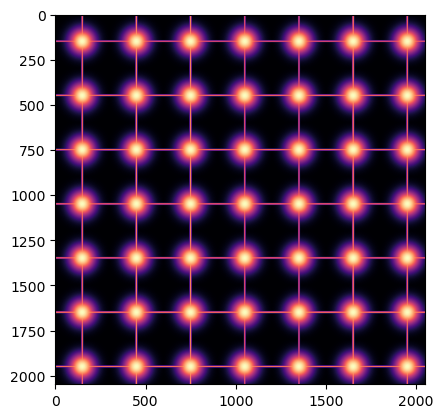

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_lines_and_save(image, locations, thickness=1, std_dev_factor=1.0, mean_shift=0, line_intensity=None):
    # Create a copy of the original image to modify
    modified_image = np.copy(image)
    
    # Determine the maximum intensity for the lines (default to image max if not specified)
    if line_intensity is None:
        line_intensity = np.max(image)
    
    # Calculate the half-thickness to determine the range around the centerline
    half_thickness = thickness // 2
    
    # Create a Gaussian distribution for the given thickness with control over standard deviation and mean
    x = np.arange(-half_thickness, half_thickness + 1)
    std_dev = std_dev_factor * (half_thickness / 2)
    gaussian_weights = norm.pdf(x, loc=mean_shift, scale=std_dev)
    gaussian_weights /= gaussian_weights.max()  # Normalize to max intensity
    
    # Draw lines on the image at the specified locations with the Gaussian distribution
    for loc in locations:
        y, x = loc
        
        # Apply Gaussian weights to the horizontal line
        for i, weight in enumerate(gaussian_weights):
            yy = y + i - half_thickness
            if 0 <= yy < image.shape[0]:  # Check bounds
                modified_image[yy, :] = np.maximum(modified_image[yy, :], weight * line_intensity)
        
        # Apply Gaussian weights to the vertical line
        for i, weight in enumerate(gaussian_weights):
            xx = x + i - half_thickness
            if 0 <= xx < image.shape[1]:  # Check bounds
                modified_image[:, xx] = np.maximum(modified_image[:, xx], weight * line_intensity)
    
    # Plot the image with the lines
    fig, ax = plt.subplots()
    ax.imshow(modified_image, cmap='magma')
    plt.show()
    
    return modified_image

# Example usage with adjustable line intensity
z = plot_lines_and_save(anisotropic, loc, thickness=55, std_dev_factor=.2, mean_shift=0, line_intensity=.8)


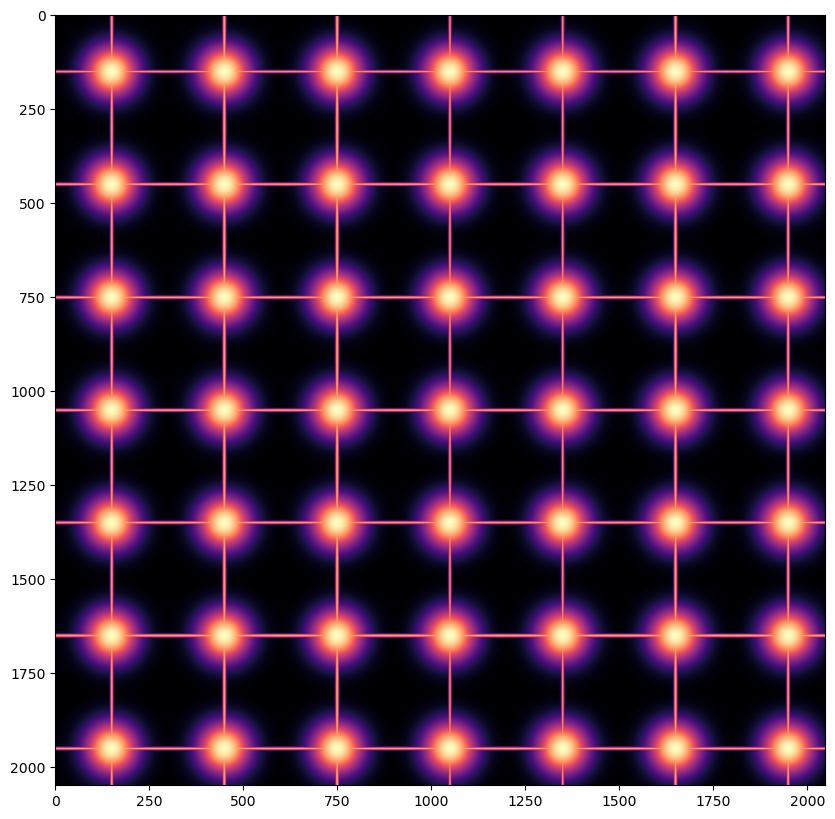

In [131]:
plt.figure(figsize=(10, 10))

plt.imshow(z, cmap='magma')

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Si


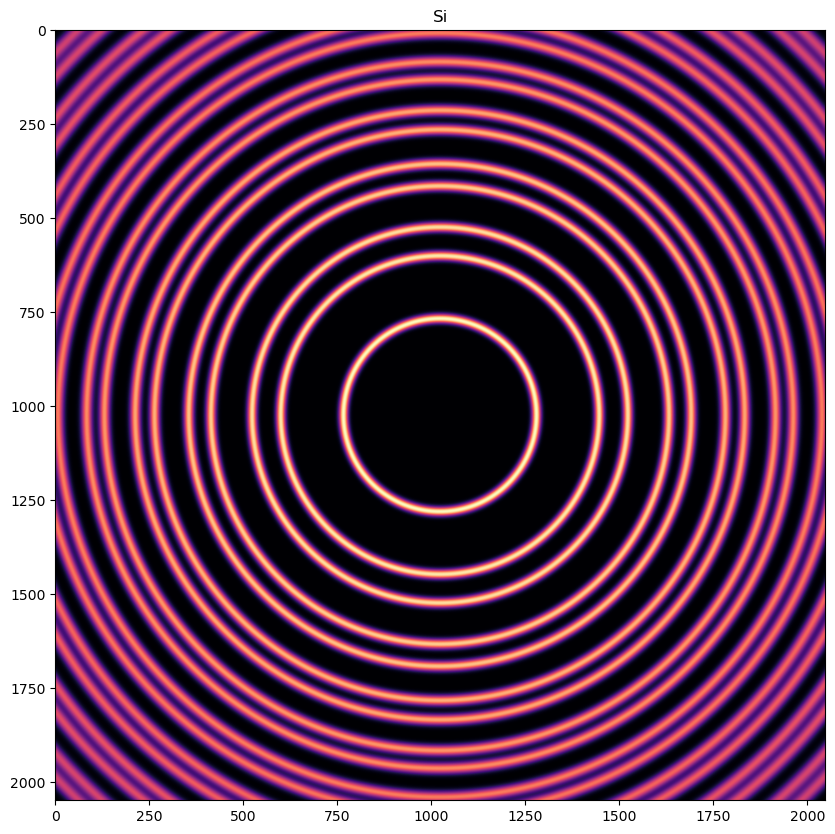

In [112]:
iso = sim.create_isotropic(.4, .4e-10, cmap = 'magma')

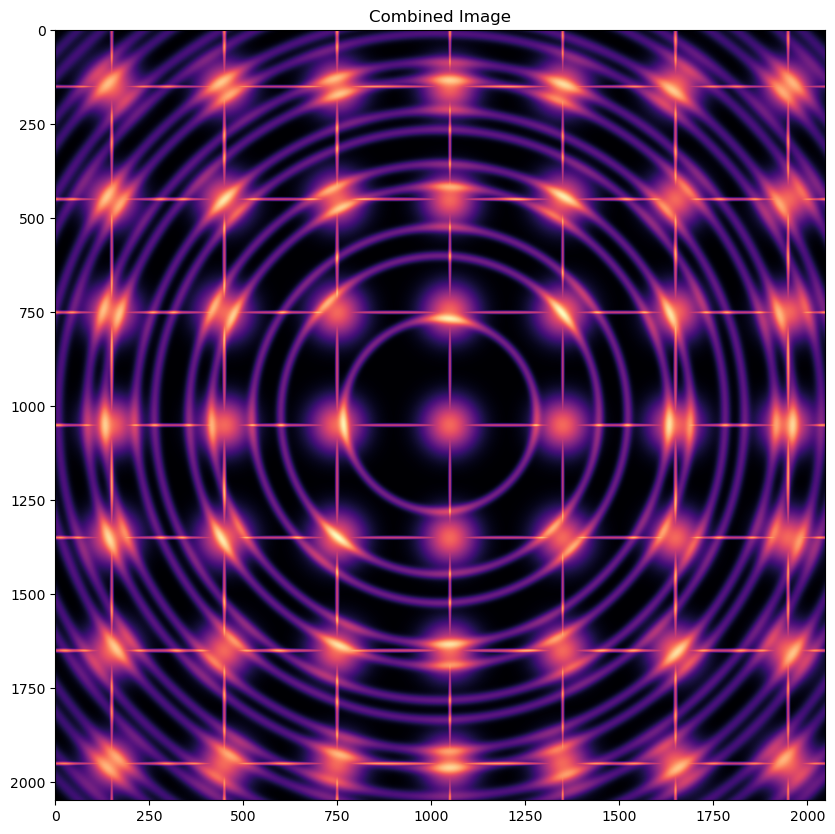

In [132]:
combine = sim.combine_image(iso, z*2, cmap = 'magma')

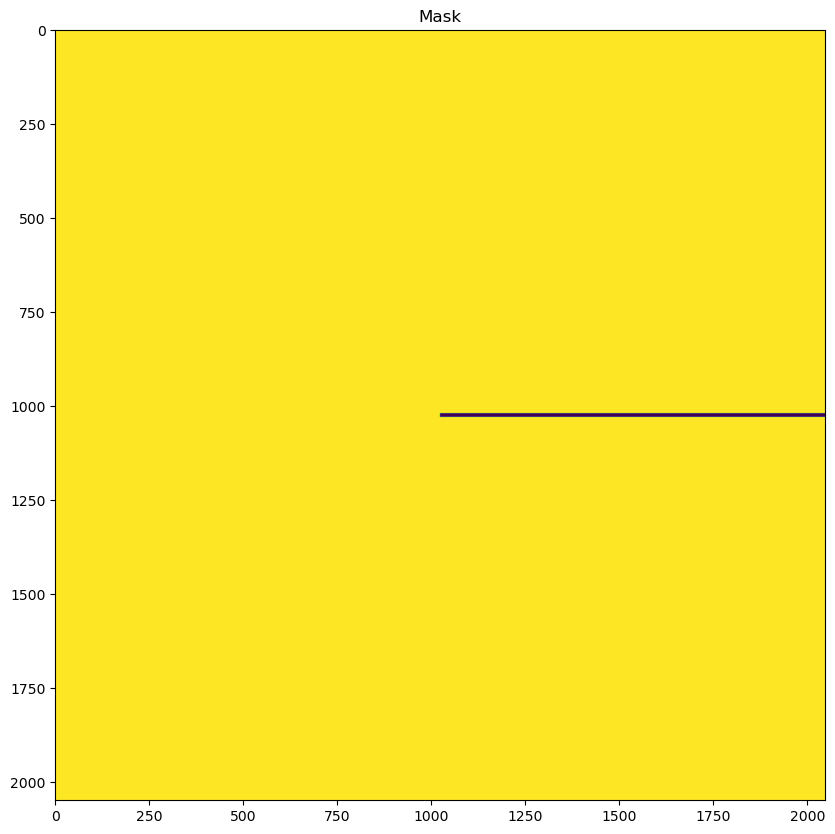

In [97]:
mask = sim.create_mask(anisotropic, 5)

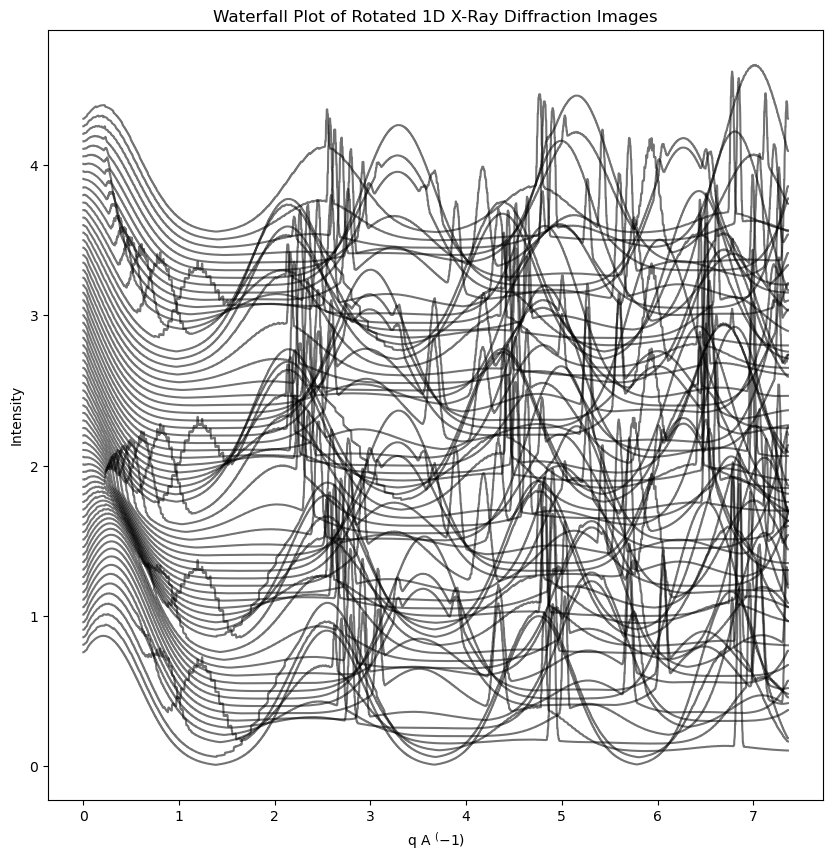

In [134]:
data= sim.rotate_and_integrate(z, 5, .4, .4e-10, mask = mask)

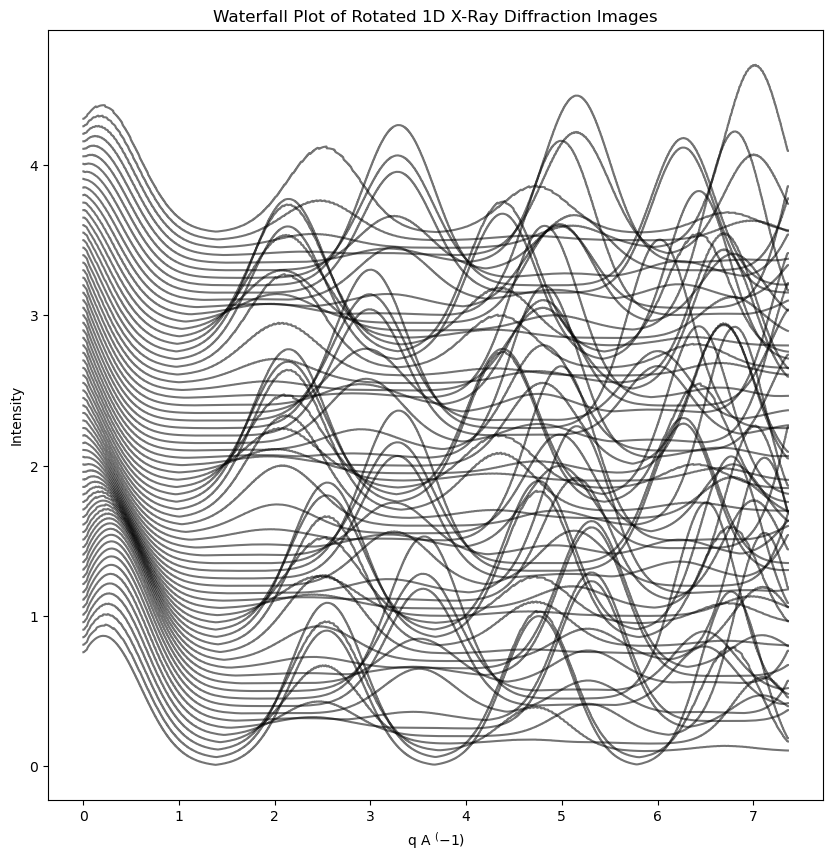

In [99]:
data_og= sim.rotate_and_integrate(anisotropic, 5, .4, .4e-10, mask = mask)

In [ ]:
def create_diffuse(anisotropic):
    locs = find_highest_intensity_locations(anisotropic, 150)
    

/blue/mbutala/dalverson/SimDAT2D/SimDAT2D/SimDAT2D/SimDAT2D.py:342: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = I


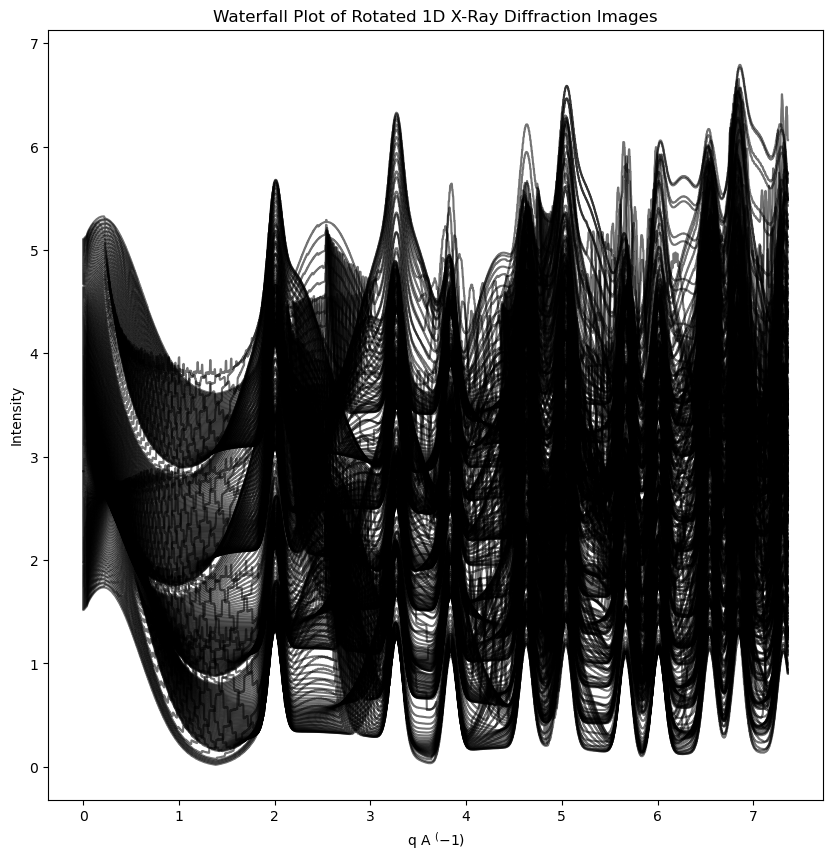

In [135]:
data_w_iso = sim.rotate_and_integrate(combine, 1, .4, .4e-10, mask = mask)

In [3]:
np.max(anisotropic)

1.0

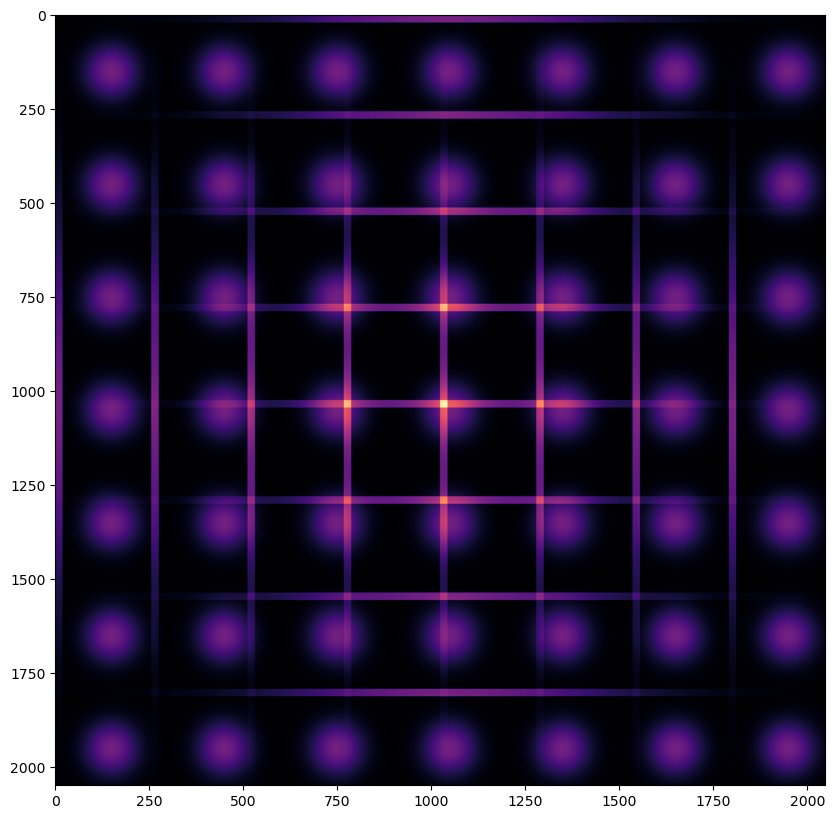

In [16]:
plt.figure(figsize = (10, 10))
c_anisotropic = anisotropic + grid
plt.imshow(c_anisotropic, cmap = 'magma')

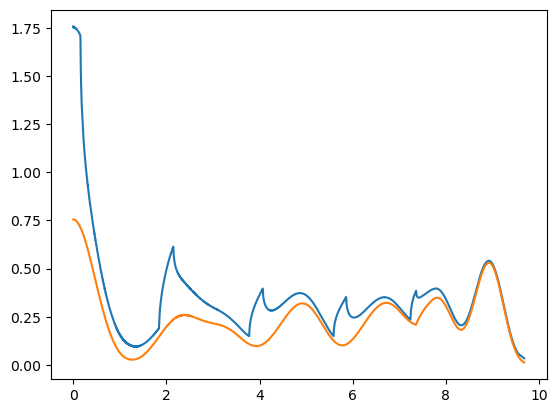

In [17]:
q, d = sim.integrate_image(c_anisotropic, .4, .4e-10)
q, aniso = sim.integrate_image(anisotropic, .4, .4e-10)

plt.plot(q, d)
plt.plot(q, aniso)

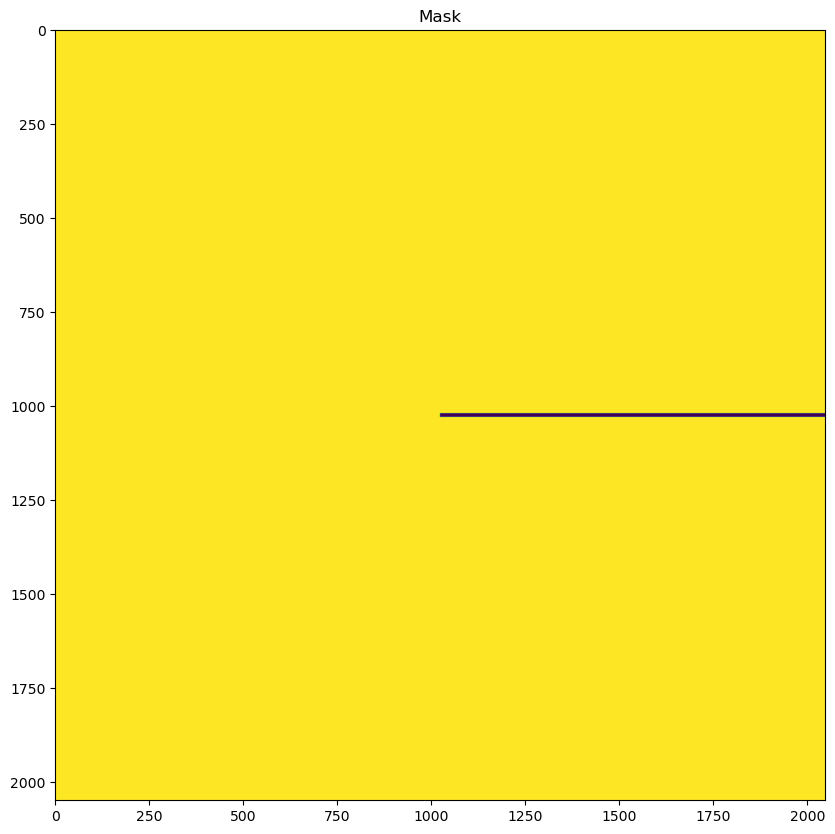

In [18]:
mask = sim.create_mask(anisotropic, 5)

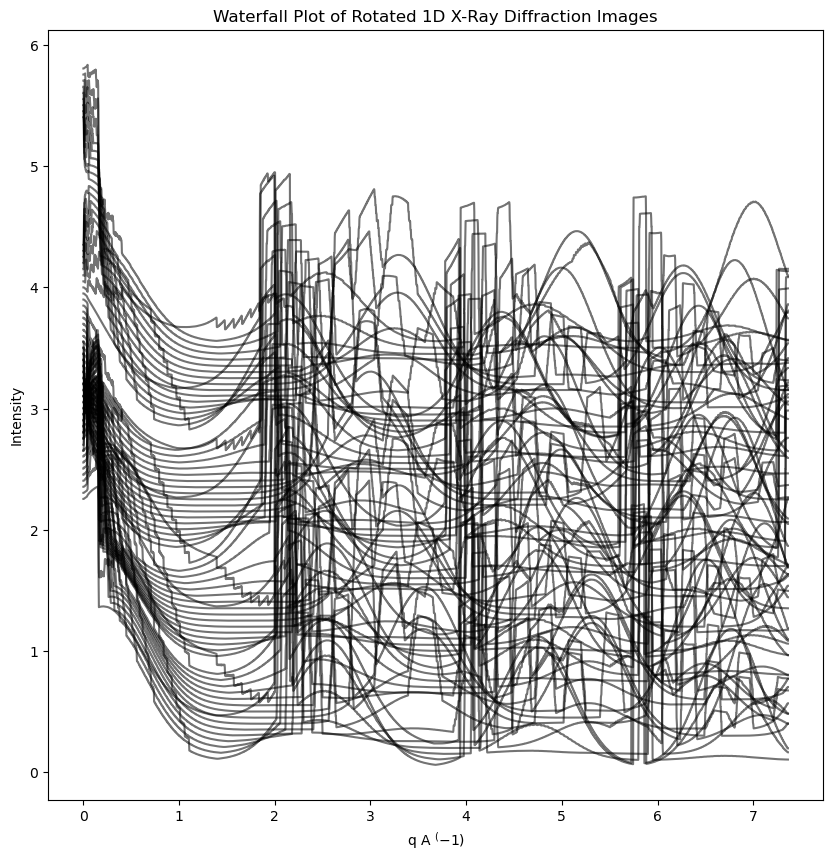

In [19]:
data= sim.rotate_and_integrate(c_anisotropic, 5, .4, .4e-10, mask = mask)

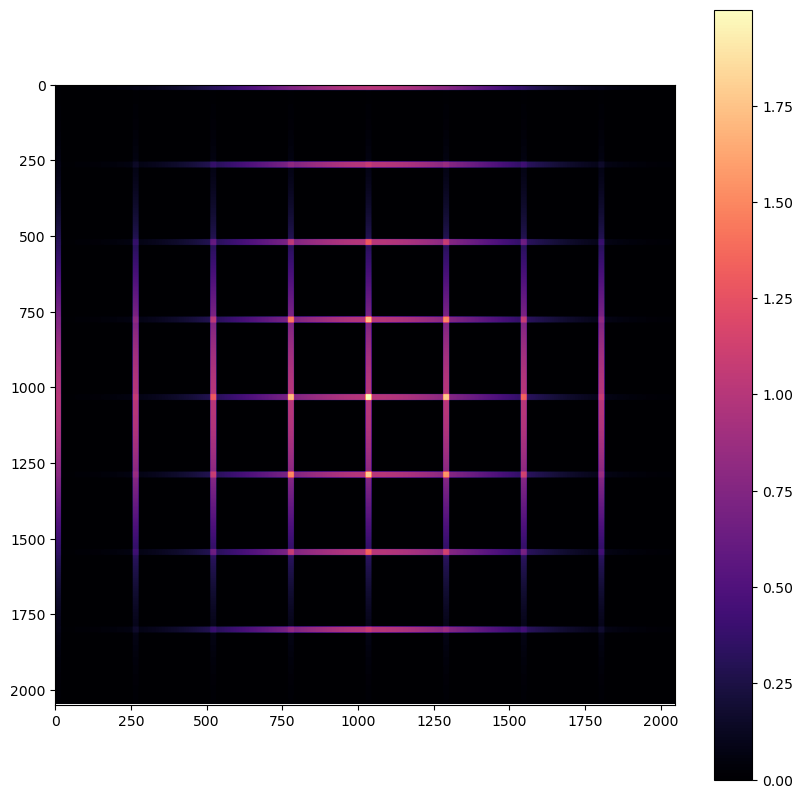

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def create_grid_with_normal_lines(box_size, grid_size, pixel_width, mean, std_dev):
    # Create an empty grid
    grid = np.zeros((box_size, box_size))
    
    # Calculate the number of pixels in each grid cell
    num_pixels = box_size // grid_size
    
    # Create a range of values across the grid
    x = np.linspace(-3*std_dev, 3*std_dev, box_size)
    
    # Calculate the normal distribution values based on the PDF
    normal_values = norm.pdf(x, mean, std_dev)
    
    # Normalize the values to fit within the grid's intensity range
    normal_values = normal_values / normal_values.max()
    
    # Iterate over each line for vertical lines
    for i in range(grid_size):
        # Calculate the line's y-coordinate
        y = i * num_pixels
        
        # Add the normal distribution values to the vertical line with the specified width
        grid[y:y+pixel_width, :] += normal_values[np.newaxis, :]
    
    # Transpose the grid to add horizontal lines
    grid = grid.T
    
    # Iterate over each line for horizontal lines
    for i in range(grid_size):
        # Calculate the line's x-coordinate
        x = i * num_pixels
        
        # Add the normal distribution values to the horizontal line with the specified width
        grid[x:x+pixel_width, :] += normal_values[np.newaxis, :]
    
    return grid

# Example usage
plt.figure(figsize=(10, 10))
grid = create_grid_with_normal_lines(box_size=2048, grid_size=8, pixel_width=20, mean=4, std_dev=53)
plt.imshow(grid, cmap='magma')
plt.colorbar()
plt.show()

In [ ]:
c = create_grid_with_lines(100, 10, 5, 0.1)

ValueError: operands could not be broadcast together with shapes (5,100) (100,1) (5,100) 

In [5]:
plt.figure(figsize=(10, 10))

a = create_gaussian_lines(10, 10, 5, 100, 10, 10)
plt.imshow(a, cmap = 'magma')

NameError: name 'create_gaussian_lines' is not defined

<Figure size 1000x1000 with 0 Axes>

In [15]:
b = create_diffuse_grid_lines(100, 10, 5, 100, 10, 10)
plt.figure(figsize=(10, 10))    
plt.imshow(b, cmap = 'magma')

NameError: name 'create_diffuse_grid_lines' is not defined

In [13]:
import numpy as np

# Define the pixel width and standard deviation
pixel_width = 1
std_dev = 1

# Calculate the highest intensity
max_intensity = 1

# Calculate the number of pixels in each line
num_pixels = box_size // grid_size

# Iterate over each line
for i in range(1, grid_size):
    # Calculate the line's y-coordinate
    y = i * spacing
    
    # Generate random values from a Gaussian distribution
    gaussian_values = np.random.normal(0, std_dev, num_pixels)
    
    # Scale the values based on the highest intensity
    scaled_values = gaussian_values * max_intensity
    
    # Add the scaled values to the original line intensities
    anisotropic[y-pixel_width:y+pixel_width, :] += scaled_values[:, np.newaxis]

NameError: name 'box_size' is not defined

In [14]:
def find_highest_intensity_locations(image, num_locations):
    # Flatten the grid to find the highest intensity locations
    flattened_grid = image.flatten()
    
    # Find the indices of the highest intensity locations
    indices = np.argpartition(flattened_grid, -num_locations)[-num_locations:]
    
    # Convert the indices to 2D coordinates
    locations = np.unravel_index(indices, grid.shape)
    
    #create a list of x,y coordintes from the locations
    locs = list(zip(locations[0], locations[1]))
    
    return locs

In [81]:
loc = find_highest_intensity_locations(anisotropic, 10)

print(loc)

[(450, 1650), (1950, 1650), (1050, 150), (1050, 1650), (750, 1950), (150, 1650), (150, 450), (1350, 1350), (1650, 1050), (1350, 750)]
